## <font color="green">Machine Learning and Deep Learning at a Glimpse</font>

1. [Importing essential packages and tools](#Importing-essential-packages-and-tools)<br>
2. [Creating dtaframe using mathematical expressions](#Creating-a-dataset-df-using-following-algorithm)<br>
3. [Exploring the dataframe](#Inspecting-the-dataframe)<br>
4. [Data correlation, visual](#Checking-correlation-visually)<br>
5. [Data correlation, numerical](#Checking-the-correlation-numerically)<br>
6. [Numerical Prediction with Deep Neural Network (DNN)](#Prediction-with-Deep-Neural-Network-(DNN))<br>
    6.1. [Activation Functions](#Activation-Functions)<br>
    6.2. [Defining the DNN model](#Defining-the-DNN-model)<br>
    6.3. [DNN Model Training](#DNN-Model-Training)<br>
    6.4. [DNN Prediction Result](#DNN-prediction-result)
7. [Prediction with Linear Regression Model](#Prediction-with-Linear-Regression-Model)<br>
    7.1. [LinearRegression Prediction Result](#LinearRegression-prediction-result)
8. [Prediction with Polynomial Regression Model](#Polynomial-Regression)<br>
    8.1. [Polynomial Regression Prediction Result](#Polynomial-Regression-Prediction-Result)<br>
9. [Conclusion](#Conclusion:)
    
    


Hi, this is a glimpse of DL, and ML. The discussion about the concerning topics are extremely brief and the purpose of making this notebook is to have an over-generalized idea. Here, a small dataset is used, certainly not viable for DL, but despite of that, been used to get a shot understanding.

<h5>Importing essential packages and tools</h5>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations

<h5>Creating a dataset <font color="lime">df</font> using following algorithm</h5>

|   <font color="red"> a    | <font color="green">   b    |  <font color="red">  c   |  <font color="green">  d    |
|:-:|:-:|:-:|:-:|
|<font color="red"> $$ a = i $$ | <font color="green"> $$ b = i^{2} + 5 $$ | <font color="red"> $$ c = ( \sqrt[2]{b/2} )^{3} $$ | <font color="green"> $$ d = ( \sqrt[2]{c/2} )^{3} $$ |


In [6]:
!jt -t chesterish

In [51]:
# creating a series from 1 to 20
a = list(range(1, 21))

In [53]:
# converting the format into array
a = np.array(a)

In [60]:
# checking the array
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [54]:
# applying the b's function into a for b's values
b = a**2+5

In [59]:
# checking the array
b

array([  6,   9,  14,  21,  30,  41,  54,  69,  86, 105, 126, 149, 174,
       201, 230, 261, 294, 329, 366, 405], dtype=int32)

In [55]:
# importing math package for square-root operation
import math

In [56]:
# applying the c's function into b for c's values
c = map(lambda x: (math.sqrt(x)/2)**3, b)

In [57]:
# converting the format into array
c = np.array(list(c))

In [68]:
# checking the array
c

array([   1.83711731,    3.375     ,    6.54790043,   12.0292612 ,
         20.53959591,   32.81601172,   49.60216729,   71.64463082,
         99.69139883,  134.4912288 ,  176.79331153,  227.34709834,
        286.90220459,  356.20835283,  436.01533803,  527.0730055 ,
        630.13123633,  745.93993768,  875.24903599, 1018.80847225])

In [75]:
# applying the d's function into c for d's values
d = map(lambda x: (math.sqrt(x)/2)**3, c)

In [76]:
# converting the format into array
d = np.array(list(d))

In [77]:
# checking the array
d

array([3.11254290e-01, 7.75033864e-01, 2.09441680e+00, 5.21516971e+00,
       1.16358431e+01, 2.34984226e+01, 4.36677678e+01, 7.58028417e+01,
       1.24421819e+02, 1.94962442e+02, 2.93838541e+02, 4.28493399e+02,
       6.07450426e+02, 8.40361527e+02, 1.13805346e+03, 1.51257241e+03,
       1.97722697e+03, 2.54662972e+03, 3.23673746e+03, 4.06489035e+03])

In [78]:
# creating a dataframe with the values
df = pd.DataFrame({"a":a,
                  "b":b,
                  "c":c,
                  "d":d})

Let's check the dataset:

In [79]:
df.head(3)

,a,b,c,d
0,1,6,1.837117,0.311254
1,2,9,3.375000,0.775034
2,3,14,6.547900,2.094417


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
a,20.0,10.500000,5.916080,1.000000,5.750000,10.500000,15.250000,20.000000
b,20.0,148.500000,127.902306,6.000000,38.250000,115.500000,237.750000,405.000000
c,20.0,285.652115,318.132429,1.837117,29.746908,155.642270,458.779755,1018.808472
d,20.0,856.431964,1207.762052,0.311254,20.532778,244.400491,1231.683197,4064.890347


<h5>Inspecting the dataframe</h5>

Let's check how many "na" values the dataset contains:

In [6]:
df.isna().sum()

a    0
b    0
c    0
d    0
dtype: int64

Let's remove "na" values if exists (a routine work for me):

In [7]:
df = df.dropna()

Let's inspect the correlation between variables visually, through pairplot:

<h5>Checking correlation visually</h5>

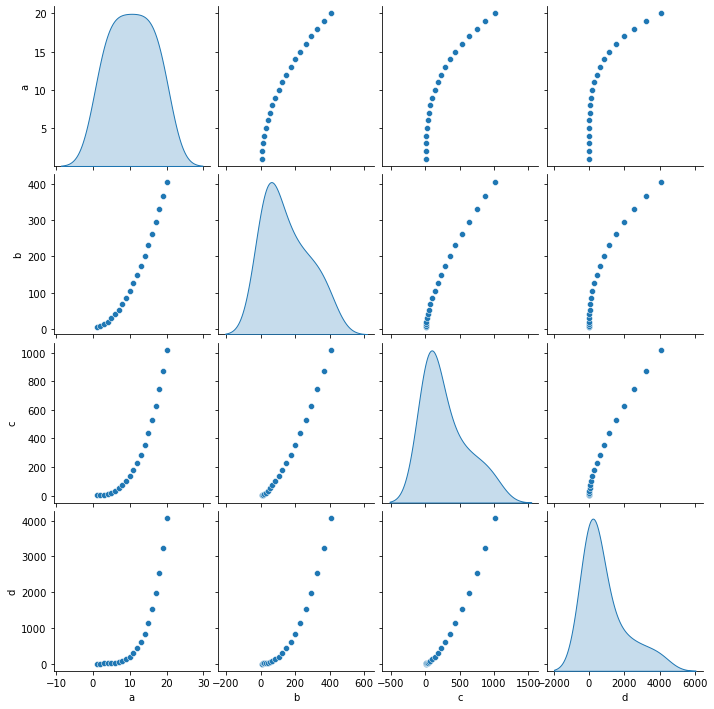

In [7]:
sns.pairplot(df[["a", "b", "c", "d"]], diag_kind="kde")

<h5>Checking the correlation numerically</h5>

In [9]:
df[["a", "b", "c", "d"]].corr()

,a,b,c,d
a,1.000000,0.971348,0.924487,0.853829
b,0.971348,1.000000,0.987480,0.946735
c,0.924487,0.987480,1.000000,0.984989
d,0.853829,0.946735,0.984989,1.000000


As refresher, the dataframe was created by following algorithm:<br><br>

$$
a = i \\
b = i^{2} + 5 \\  
c = ( \sqrt[2]{b/2} )^{3} \\ 
d ={\sqrt[2]{c}})^{3}
$$

In [111]:
import scipy
from scipy import stats

print("correlation of:")
print("d and a:", scipy.stats.pearsonr(df.d, df.a))
print("d and b:", scipy.stats.pearsonr(df.d, df.b))
print("d and c:", scipy.stats.pearsonr(df.d, df.c))

correlation of:
d and a: (0.8538285886595324, 1.6808636979870966e-06)
d and b: (0.9467351851128935, 2.6995520652179287e-10)
d and c: (0.9849892131679784, 3.48043409701835e-15)


In [112]:
# seperating independent variables
feature = df.copy()   # defining indep. variables

output = feature.pop("d")   # defining dep. variables

In [113]:
feature = df[["a", "b", "c"]]
output = df[["d"]]

<h3><font color="blue">Prediction with Deep Neural Network (DNN)</font></h3>

In [114]:
# normalization
normalizer = tf.keras.layers.Normalization(axis=-1)

In [115]:
# let's fit the state of the preprocessing layer to the data
normalizer.adapt(np.array(feature))
normalizer.adapt(np.array(output))

In [15]:
output

,d
0,0.311254
1,0.775034
2,2.094417
3,5.215170
4,11.635843
5,23.498423
6,43.667768
7,75.802842
8,124.421819
9,194.962442


In [150]:
# let's create a function of DNN Regression model

def build_and_compile_model(norm):
    model = tf.keras.Sequential([norm,
                              layers.Dense(128, activation="PReLU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(128, activation="ELU"),
                              layers.Dense(1)])
    
    model.compile(loss="mean_absolute_error",
                 optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

<h5>Activation Functions</h5> following the type of the graphs, the following methods could be used
<br>
<img src="https://miro.medium.com/max/864/1*9X_cq19Vp1brXdhjtFCoyQ.png">



<h5>Defining the DNN model</h5>

In [151]:
# let's define DNN Regression model
dnn_model = build_and_compile_model(normalizer)

In [143]:
# let's check the model summary
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense_47 (Dense)            (None, 128)               512       
                                                                 
 dense_48 (Dense)            (None, 128)               16640     
                                                                 
 dense_49 (Dense)            (None, 128)               16512     
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 dense_51 (Dense)            (None, 128)               16512     
                                                      

Let's train the model

In [119]:
feature["a"]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: a, dtype: int32

<h5>DNN Model Training</h5>
Training the model for 100000 times.

In [155]:
history = dnn_model.fit(
    feature[["a","b","c"]],
    output,
    # validation_split=0.2,   # optional for this instance
    verbose=0,   # 0 or 1 or 2, shows the training simulation 
    epochs=100000)

Let's evaluate the model

In [156]:
dnn_model.predict(np.array([120, 14405, 216112.5098]))

array([[458171.53]], dtype=float32)

<h5>DNN prediction result</h5>

In [157]:
print("the accuracy is :", 458171.53/12558271.66*100, "%")

the accuracy is : 3.648364539360507 %


It's evident that, deep learning is not viable for small dataset, though the correlations are strong.

<h3><font color="blue">Prediction with Linear Regression Model<font color="blue"></h3>

In [82]:
df

,a,b,c,d
0,1,6,1.837117,0.311254
1,2,9,3.375000,0.775034
2,3,14,6.547900,2.094417
3,4,21,12.029261,5.215170
4,5,30,20.539596,11.635843
5,6,41,32.816012,23.498423
6,7,54,49.602167,43.667768
7,8,69,71.644631,75.802842
8,9,86,99.691399,124.421819
9,10,105,134.491229,194.962442


In [83]:
ind = df[["a", "b", "c"]]

In [84]:
dep = df[["d"]]

In [85]:
from sklearn import linear_model

In [86]:
reg = linear_model.LinearRegression()

In [87]:
reg.fit(ind, dep)

LinearRegression()

In [89]:
df_test = pd.DataFrame({"a":[120],
                       "b":[14405],
                       "c":[216112.5098]})

In [90]:
pred_ln = reg.predict(df_test)

pred_ln

array([[1939889.87888794]])

<h5>LinearRegression prediction result</h5>

In [92]:
print("the accuracy is :", (100 * pred_ln/12558271.66), "%")

the accuracy is : [[15.44710874]] %


<h5>Polynomial Regression</h5>

In [99]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [100]:
poly = PolynomialFeatures(degree = 2)

In [101]:
X_poly = poly.fit_transform(ind)

In [102]:
y = dep

In [103]:
poly.fit(X_poly, y)

PolynomialFeatures()

In [105]:
lin2 = linear_model.LinearRegression()

In [106]:
lin2.fit(X_poly, y)

LinearRegression()

In [108]:
pol_result = lin2.predict(poly.fit_transform(df_test))

<h5>Polynomial Regression Prediction Result</h5>

In [109]:
print("the accuracy is :", pol_result/12558271.66*100, "%")

the accuracy is : [[81.65326656]] %


<h2><font color="blue">Conclusion:</font></h2><br><br>
It's evident that, with a small dataset, it is better to use polynomial regression for better prediction. However, it needs to be remembered that situation to situation it may vary. So, fathoming the situation, take the leap of prediction! Cheers!